## Data Cleaning for Sberbank Kaggle Competition

In [1]:
# import libraries; %matplotlib inline is used to display visualization in Jupyter
import pandas as pd                        # Data Munging
import numpy as np                         # Data Munging
from numpy import nan                      # Data Munging
from pandas.plotting import scatter_matrix # Visualization
%matplotlib inline
pd.set_option('display.max_rows', 50)      # Set Num of Rows to Display

Load data set. Note that this data combines both the train and test samples to simplify imputations. While there is potential leakage (test set values being leaked to train set), we believe that the number of observations is large enough to not have a significant impact. Moreover, the train set has about 4 times the number of observations than the test set.

In [3]:
cleaning = pd.read_csv('./github/full_data_kaggle.csv', 
                        header='infer')
cleaning = cleaning.drop('Unnamed: 0', 1) # drop auto-generated index column

## Clean 'full_sq', 'build_year', and 'sub_area'

### a) Clean full_sq

Visualize outliers for full_sq

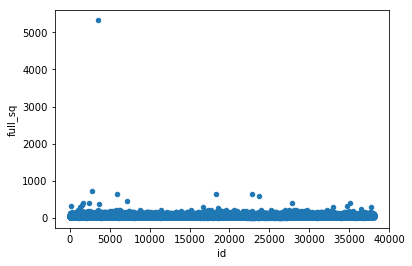

In [4]:
cleaning.plot.scatter(x='id', y='full_sq')

From above scatterplot, we see one outlier with >5000 full_sq, and about a dozen that is above the normal threshold.

Examine upper limit outliers.

In [5]:
cleaning.loc[cleaning['full_sq'] > 300]

,id,sub_area,full_sq,life_sq,num_room,floor,max_floor,build_year,kindergarten_km,school_km,metro_km_avto,public_healthcare_km,timestamp,product_type,type
128,129,Ivanovskoe,325.0,325.0,NaN,7.0,NaN,NaN,0.161408,0.369984,1.070556,1.823912,2011-10-15,Investment,train_set
1478,1481,Solncevo,353.0,20.0,NaN,5.0,NaN,NaN,0.693142,0.492894,1.021101,2.326553,2012-03-11,Investment,train_set
1610,1613,Ljublino,394.0,17.0,NaN,11.0,NaN,NaN,0.294243,0.243053,1.686566,0.861904,2012-03-21,Investment,train_set
2425,2428,Filevskij Park,412.0,17.0,NaN,6.0,NaN,NaN,0.236231,0.068637,1.088067,0.664952,2012-06-07,Investment,train_set
2780,2783,Troparevo-Nikulino,729.0,44.0,NaN,12.0,NaN,NaN,0.136485,0.426871,1.965385,0.564859,2012-07-06,Investment,train_set
3527,3530,Birjulevo Vostochnoe,5326.0,22.0,NaN,13.0,NaN,NaN,0.780191,0.699257,3.115648,2.149384,2012-09-07,OwnerOccupier,train_set
3596,3599,Nekrasovka,388.0,NaN,NaN,9.0,NaN,NaN,1.553718,0.480208,0.369301,3.983903,2012-09-12,OwnerOccupier,train_set
5944,5947,Lianozovo,634.0,38.0,NaN,3.0,NaN,NaN,0.025172,0.353390,0.760070,1.566321,2013-02-07,Investment,train_set
7207,7210,Vyhino-Zhulebino,461.0,27.0,NaN,2.0,NaN,NaN,0.124746,0.206264,2.060625,1.496204,2013-04-10,Investment,train_set
16743,16746,Obruchevskoe,303.0,NaN,6.0,32.0,32.0,NaN,0.411293,0.755596,2.070597,2.030509,2014-03-31,OwnerOccupier,train_set


For the outlier with full_sq = 5326, we will divide it by 10.

In [5]:
# reduce outlier by factor of 10
cleaning.loc[3527, 'full_sq'] = 5326/10

Examine lower limit outliers.

In [6]:
# examine full_sq outliers
cleaning.loc[cleaning['full_sq'] < 10]

,id,sub_area,full_sq,life_sq,num_room,floor,max_floor,build_year,kindergarten_km,school_km,metro_km_avto,public_healthcare_km,timestamp,product_type,type
1188,1189,Veshnjaki,9.0,44.00,NaN,3.0,NaN,NaN,0.149637,0.143686,1.318052,1.476782,2012-02-14,Investment,train_set
2009,2012,Gol'janovo,5.0,40.00,NaN,5.0,NaN,NaN,0.244690,0.389462,1.336681,1.148914,2012-04-25,Investment,train_set
6112,6115,Poselenie Voskresenskoe,6.0,NaN,NaN,3.0,NaN,NaN,0.745286,0.936324,2.436882,2.992295,2013-02-22,OwnerOccupier,train_set
11332,11335,Poselenie Shherbinka,1.0,40.00,1.0,10.0,17.0,2013.0,0.457030,2.204638,5.057598,5.934842,2013-10-18,OwnerOccupier,train_set
16289,16292,Poselenie Voskresenskoe,1.0,1.00,1.0,1.0,1.0,1.0,0.745286,0.936324,2.436882,2.992295,2014-03-20,OwnerOccupier,train_set
16738,16741,Poselenie Voskresenskoe,1.0,1.00,1.0,1.0,1.0,1.0,0.881054,1.078636,2.531422,3.086835,2014-03-31,OwnerOccupier,train_set
17194,17197,Pokrovskoe Streshnevo,1.0,1.00,1.0,1.0,1.0,1.0,1.005061,0.331429,2.503194,0.520465,2014-04-09,OwnerOccupier,train_set
17932,17935,Poselenie Voskresenskoe,0.0,0.00,0.0,0.0,0.0,0.0,0.647239,0.826052,2.254916,3.262483,2014-04-28,OwnerOccupier,train_set
18600,18603,Tverskoe,1.0,1.00,1.0,1.0,1.0,1.0,1.048962,0.269716,1.036568,2.608162,2014-05-19,OwnerOccupier,train_set
22171,22174,Poselenie Vnukovskoe,1.0,1.00,1.0,1.0,1.0,1.0,1.170413,1.545730,2.077115,2.407790,2014-09-03,OwnerOccupier,train_set


Manually impute full_sq with life_sq when full_sq is less than life_sq.

In [6]:
cleaning.loc[11332, 'full_sq'] = 40
cleaning.loc[22412, 'full_sq'] = 47
cleaning.loc[24296, 'full_sq'] = 77
cleaning.loc[26264, 'full_sq'] = 60
cleaning.loc[26363, 'full_sq'] = 64
cleaning.loc[30935, 'full_sq'] = 37.80
cleaning.loc[35854, 'full_sq'] = 42.07
cleaning.loc[1188, 'full_sq'] = 44.0
cleaning.loc[2009, 'full_sq'] = 44.0

For full_sq < 10, we will impute with the average full_sq by sub_area.
We first create a table with the average full_sq by sub_area.

In [7]:
full_sq_mean = cleaning.groupby(['sub_area']).full_sq.mean().reset_index()
full_sq_mean.columns = ['sub_area', 'mean_full_sq']
full_sq_mean

,sub_area,mean_full_sq
0,Ajeroport,55.037662
1,Akademicheskoe,58.376654
2,Alekseevskoe,53.519697
3,Altuf'evskoe,47.448750
4,Arbat,59.768182
5,Babushkinskoe,49.339299
6,Basmannoe,61.507692
7,Begovoe,57.024286
8,Beskudnikovskoe,50.846798
9,Bibirevo,49.438989


Impute by average full_sq for full_sq < 10.

In [10]:
cleaning = pd.merge(cleaning, full_sq_mean, how='left', on=['sub_area']) # join mean_full_sq
cleaning

,id,sub_area,full_sq,life_sq,num_room,floor,max_floor,build_year,kindergarten_km,school_km,metro_km_avto,public_healthcare_km,timestamp,product_type,type,mean_full_sq_x,mean_full_sq_y,mean_full_sq
0,1,Bibirevo,43.00,27.00,NaN,4.0,NaN,NaN,0.145700,0.177975,1.131260,0.974743,2011-08-20,Investment,train_set,49.438989,49.438989,49.438989
1,2,Nagatinskij Zaton,34.00,19.00,NaN,3.0,NaN,NaN,0.147754,0.273345,0.647337,1.477723,2011-08-23,Investment,train_set,52.141296,52.141296,52.141296
2,3,Tekstil'shhiki,43.00,29.00,NaN,2.0,NaN,NaN,0.049102,0.158072,1.637996,0.097144,2011-08-27,Investment,train_set,49.270571,49.270571,49.270571
3,4,Mitino,89.00,50.00,NaN,9.0,NaN,NaN,0.179441,0.236455,0.984537,2.163735,2011-09-01,Investment,train_set,61.051737,61.051737,61.051737
4,5,Basmannoe,77.00,77.00,NaN,4.0,NaN,NaN,0.247901,0.376838,0.876620,1.121703,2011-09-05,Investment,train_set,61.507692,61.507692,61.507692
5,6,Nizhegorodskoe,67.00,46.00,NaN,14.0,NaN,NaN,0.145955,0.113466,1.593246,1.698724,2011-09-06,Investment,train_set,45.815730,45.815730,45.815730
6,7,Sokol'niki,25.00,14.00,NaN,10.0,NaN,NaN,0.501166,0.516979,1.026916,0.868404,2011-09-08,Investment,train_set,56.473973,56.473973,56.473973
7,8,Bibirevo,44.00,44.00,NaN,5.0,NaN,NaN,0.134365,0.581511,1.593203,0.746260,2011-09-09,Investment,train_set,49.438989,49.438989,49.438989
8,9,Koptevo,42.00,27.00,NaN,5.0,NaN,NaN,0.112905,0.256589,1.338707,1.032524,2011-09-10,Investment,train_set,47.362025,47.362025,47.362025
9,10,Kuncevo,36.00,21.00,NaN,9.0,NaN,NaN,0.309673,0.150686,0.396275,2.604185,2011-09-13,Investment,train_set,56.819197,56.819197,56.819197


In [11]:
cleaning.loc[cleaning['full_sq'] < 10, 'full_sq'] = cleaning['mean_full_sq'] # impute

In [12]:
cleaning = cleaning.drop('mean_full_sq', 1) # drop mean_full_sq column

### b) Clean build_year

Examine build_year outliers. We see that a decent portion of the observations contains build years that don't really make sense (i.e. 0, 1, 20052009). There is also a high number (about 15K) of NaN values.

In [13]:
## Visualizing outliers for build_year
cleaning['build_year'].value_counts(dropna=False).sort_index()

 0.0             899
 1.0             555
 2.0               1
 3.0               2
 20.0              1
 71.0              1
 215.0             2
 1691.0            1
 1860.0            2
 1875.0            1
 1876.0            1
 1886.0            1
 1890.0            7
 1895.0            2
 1896.0            2
 1898.0            1
 1900.0            2
 1902.0            1
 1904.0            1
 1905.0            2
 1906.0            2
 1907.0            2
 1908.0            1
 1910.0            6
 1911.0            4
               ...  
 1998.0          187
 1999.0          178
 2000.0          186
 2001.0          240
 2002.0          279
 2003.0          254
 2004.0          286
 2005.0          241
 2006.0          334
 2007.0          265
 2008.0          308
 2009.0          234
 2010.0          179
 2011.0          223
 2012.0          307
 2013.0          724
 2014.0         1118
 2015.0         1083
 2016.0          775
 2017.0          567
 2018.0           31
 2019.0      

Manually impute the following observations: 20052009 to 2009, 4965 to 1965, 71 to 1971

In [14]:
cleaning.loc[cleaning['build_year'] == 20052009, 'build_year'] = 2009
cleaning.loc[cleaning['build_year'] == 4965, 'build_year'] = 1965
cleaning.loc[cleaning['build_year'] == 71, 'build_year'] = 1971

Get most frequent year by sub_area; if most frequent year is 0 or 1 (i.e. the outliers we saw), impute by year 2014 (most common year of the data set).


In [16]:
build_year_all = cleaning.groupby(['sub_area', 'build_year']).count().reset_index()
build_year_top = build_year_all.iloc[build_year_all.groupby(['sub_area']).apply(lambda x: x['id'].idxmax())]
build_year_top = build_year_top[['sub_area', "build_year"]]
build_year_top.loc[build_year_top['build_year'] < 10, "build_year"] = 2014
build_year_top.columns = ['sub_area', 'top_build_year']
build_year_top 

,sub_area,top_build_year
13,Ajeroport,1961.0
83,Akademicheskoe,2012.0
97,Alekseevskoe,1965.0
129,Altuf'evskoe,1978.0
149,Arbat,1964.0
169,Babushkinskoe,1971.0
194,Basmannoe,2014.0
250,Begovoe,1964.0
269,Beskudnikovskoe,1971.0
297,Bibirevo,1974.0


Replace outlier build_years by most common build_year by sub_area.

In [17]:
cleaning = pd.merge(cleaning, build_year_top, how='left', on=['sub_area'])
cleaning.loc[cleaning['build_year'] < 1800, 'build_year'] = cleaning['top_build_year']
cleaning.loc[pd.isnull(cleaning['build_year']), 'build_year'] = cleaning['top_build_year']

Confirm that outliers are fixed.

In [18]:
cleaning['build_year'].value_counts(dropna=False).sort_index()

1860.0       2
1875.0       1
1876.0       1
1886.0       1
1890.0       7
1895.0       2
1896.0       2
1898.0       1
1900.0       2
1902.0       1
1904.0       1
1905.0       2
1906.0       2
1907.0       2
1908.0       1
1910.0       6
1911.0       4
1912.0       6
1914.0       5
1915.0       5
1917.0      19
1920.0       1
1924.0       4
1925.0       1
1926.0      16
          ... 
1995.0     189
1996.0     206
1997.0     197
1998.0     187
1999.0     178
2000.0     186
2001.0     363
2002.0     279
2003.0     345
2004.0     314
2005.0     241
2006.0     470
2007.0     306
2008.0     363
2009.0     235
2010.0     211
2011.0     253
2012.0     478
2013.0    1382
2014.0    7017
2015.0    3596
2016.0    1557
2017.0     833
2018.0      31
2019.0       5
Name: build_year, Length: 117, dtype: int64

### c) Clean sub_area

In order to use the variable importance function in the Random Forest model, we will need to reduce the number of sub areas to be less than 63 categories. Let's examine the top 50 sub area by frequency.

In [19]:
np.array(cleaning.loc[:, 'sub_area'].value_counts()[:50].index)

array(['Poselenie Sosenskoe', 'Poselenie Vnukovskoe', 'Nekrasovka',
       'Poselenie Moskovskij', 'Tverskoe', 'Mitino',
       'Poselenie Voskresenskoe', 'Solncevo', "Mar'ino", 'Krjukovo',
       'Nagatinskij Zaton', 'Juzhnoe Butovo', 'Zapadnoe Degunino',
       'Poselenie Shherbinka', 'Poselenie Desjonovskoe',
       'Poselenie Filimonkovskoe', 'Otradnoe', 'Nagornoe', 'Ljublino',
       "Gol'janovo", 'Bogorodskoe', 'Strogino', 'Izmajlovo',
       'Chertanovo Juzhnoe', 'Severnoe Tushino', 'Horoshevo-Mnevniki',
       "Tekstil'shhiki", 'Vyhino-Zhulebino', 'Birjulevo Vostochnoe',
       'Ochakovo-Matveevskoe', 'Golovinskoe', 'Zjuzino', 'Jasenevo',
       'Perovo', 'Ramenki', 'Kosino-Uhtomskoe', "Kuz'minki", 'Danilovskoe',
       'Bibirevo', 'Caricyno', "Kon'kovo", 'Chertanovo Severnoe',
       'Akademicheskoe', 'Veshnjaki', 'Orehovo-Borisovo Severnoe',
       'Kuncevo', 'Orehovo-Borisovo Juzhnoe', 'Mozhajskoe',
       'Poselenie Novofedorovskoe', 'Presnenskoe'], dtype=object)

Impute sub_areas that are not in the top 50 list as 'other'.

In [20]:
freq_area = np.array(cleaning.loc[:, 'sub_area'].value_counts()[:60].index)
cleaning.loc[~cleaning['sub_area'].isin(freq_area), 'sub_area'] = 'other'

In [21]:
cleaning = cleaning[['id','sub_area', 'full_sq', 'build_year']]

## Clean Macro Features

We used XGBoost to determine top 20 macro features. We will examine for missing values.

In [22]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import nan
%matplotlib inline
pd.set_option('display.max_rows', 50)

In [23]:
macro_train = pd.read_csv('./github/Macro_Train.csv', 
                        header='infer')
macro_train = macro_train.drop('Unnamed: 0', 1)
macro_test = pd.read_csv('./github/Macro_Test.csv', 
                        header='infer')
macro_test = macro_test.drop('Unnamed: 0', 1)

In [24]:
macro_train.isnull().sum(axis=0)

id                       0
timestamp                0
price_doc                0
usdrub                   0
eurrub                   0
brent                    0
micex_cbi_tr             0
micex                    0
micex_rgbi_tr            0
rts                      0
oil_urals                0
cpi                      0
balance_trade            0
gdp_quart                0
ppi                      0
net_capital_export       0
rent_price_4+room_bus    0
income_per_cap           0
deposits_growth          0
rent_price_2room_bus     0
gdp_quart_growth         0
rent_price_3room_bus     0
rent_price_1room_bus     0
dtype: int64

We will need to drop price_doc from macro_train prior to joining with the existing features.

In [25]:
macro_train = macro_train.drop('price_doc', 1)

Below we see that the test set has a significant number of missing income_per_cap. We will drop this feature from both train and test set.

In [27]:
macro_test.isnull().sum(axis=0)

id                          0
timestamp                   0
usdrub                      0
eurrub                      0
brent                       0
micex_cbi_tr                0
micex                       0
micex_rgbi_tr               0
rts                         0
oil_urals                   0
cpi                         0
balance_trade               0
gdp_quart                   0
ppi                         0
net_capital_export          0
rent_price_4+room_bus       0
income_per_cap           3983
deposits_growth             0
rent_price_2room_bus        0
gdp_quart_growth            0
rent_price_3room_bus        0
rent_price_1room_bus        0
dtype: int64

In [12]:
macro_train = macro_train.drop('income_per_cap', 1)
macro_test = macro_test.drop('income_per_cap', 1)

In this section we will merge the macro features into the second set of train and test data sets we have created.

In [29]:
train_df2 = pd.read_csv('./github/train_df2.csv', 
                        header='infer')
test_df2 = pd.read_csv('./github/test_df2.csv', 
                        header='infer')

Confirm successful merge

In [18]:
train_df2

,id,kindergarten_km,school_km,metro_km_avto,public_healthcare_km,month,year,sub_area,full_sq,build_year,...,green_zone_km,industrial_km,public_transport_station_km,water_km,big_road1_km,railroad_km,radiation_km,fitness_km,shopping_centers_km,preschool_km
0,1,0.145700,0.177975,1.131260,0.974743,8,2011,Bibirevo,43.0,1974,...,0.600973,1.080934,0.274985,0.992631,1.422391,1.305159,1.210027,0.485841,0.648488,0.177975
1,2,0.147754,0.273345,0.647337,1.477723,8,2011,Nagatinskij Zaton,34.0,2017,...,0.065321,0.966479,0.065263,0.698081,2.887377,0.694536,2.724295,0.668364,0.519311,0.273345
2,3,0.049102,0.158072,1.637996,0.097144,8,2011,Tekstil'shhiki,43.0,1969,...,0.453172,0.939275,0.328756,0.468265,0.647250,0.700691,0.772216,0.733101,1.486533,0.158072
3,4,0.179441,0.236455,0.984537,2.163735,9,2011,Mitino,89.0,2015,...,0.106125,0.451173,0.131597,1.200336,2.677824,1.999265,6.348716,0.623484,0.599914,0.236455
4,5,0.247901,0.376838,0.876620,1.121703,9,2011,other,77.0,2014,...,0.236214,0.392871,0.071480,0.820294,1.721834,0.084113,1.638318,0.220288,0.429052,0.376838
5,6,0.145955,0.113466,1.593246,1.698724,9,2011,other,67.0,1962,...,1.497903,0.256487,0.189227,0.612447,0.284868,0.244670,0.193127,0.810413,0.440707,0.113466
6,7,0.501166,0.516979,1.026916,0.868404,9,2011,other,25.0,1957,...,0.632445,0.707268,0.050211,0.399865,2.026623,0.464015,2.106487,0.132256,0.513689,0.516979
7,8,0.134365,0.581511,1.593203,0.746260,9,2011,Bibirevo,44.0,1974,...,0.165124,1.166992,0.254814,0.567006,1.042290,1.964851,1.149883,0.342545,0.657587,0.581511
8,9,0.112905,0.256589,1.338707,1.032524,9,2011,other,42.0,1960,...,0.148957,0.670432,0.219776,0.322955,2.438125,0.833580,2.679181,0.000000,2.332388,0.256589
9,10,0.309673,0.150686,0.396275,2.604185,9,2011,Kuncevo,36.0,2006,...,0.191191,2.024971,0.218410,1.021499,1.101814,0.147894,0.615020,0.508802,0.912379,0.150686


Check for missingness

In [30]:
train_df2.isnull().sum(axis=0)

id                             0
kindergarten_km                0
school_km                      0
metro_km_avto                  0
public_healthcare_km           0
month                          0
year                           0
sub_area                       0
full_sq                        0
build_year                     0
floor                          0
max_floor                      0
price_doc                      0
product_type                   0
area_m                         0
raion_popul                    0
metro_min_avto                 0
park_km                        0
green_zone_km                  0
industrial_km                  0
public_transport_station_km    0
water_km                       0
big_road1_km                   0
railroad_km                    0
radiation_km                   0
fitness_km                     0
shopping_centers_km            0
preschool_km                   0
dtype: int64

In [31]:
test_df2.isnull().sum(axis=0) 

id                                0
kindergarten_km                   0
school_km                         0
metro_km_avto                     0
public_healthcare_km              0
month                             0
year                              0
sub_area                          0
full_sq                           0
build_year                        0
floor                             0
max_floor                         0
product_type                      0
life_sq                        1176
material                          0
num_room                          0
kitch_sq                          0
state                           694
area_m                            0
raion_popul                       0
metro_min_avto                    0
park_km                           0
green_zone_km                     0
industrial_km                     0
public_transport_station_km       0
water_km                          0
big_road1_km                      0
railroad_km                 

Previously we had removed life_sq, material, num_room, kitch_sq, and state from the training set. We will drop those from the test set as well.

In [32]:
test_df2 = test_df2.drop(["life_sq", "material", "num_room", "kitch_sq", "state"], 1)

In [33]:
test_df2.isnull().sum(axis=0) 

id                             0
kindergarten_km                0
school_km                      0
metro_km_avto                  0
public_healthcare_km           0
month                          0
year                           0
sub_area                       0
full_sq                        0
build_year                     0
floor                          0
max_floor                      0
product_type                   0
area_m                         0
raion_popul                    0
metro_min_avto                 0
park_km                        0
green_zone_km                  0
industrial_km                  0
public_transport_station_km    0
water_km                       0
big_road1_km                   0
railroad_km                    0
radiation_km                   0
fitness_km                     0
shopping_centers_km            0
preschool_km                   0
dtype: int64

Confirm correct shape. We should expect training to contain one additional feature that test doesn't (i.e. price_doc)

In [42]:
train_df2.shape

(30471, 28)

In [32]:
test_df2.shape

(7662, 27)

The tables are ready for merge.

In [34]:
train_df3 = pd.merge(train_df2, macro_train, on='id', how='left')
test_df3 = pd.merge(test_df2, macro_test, on='id', how='left')

In [35]:
train_df3.shape

(30471, 49)

In [36]:
test_df3.shape

(7662, 48)

Check for missing values.

In [37]:
train_df3.isnull().sum(axis=0)

id                             0
kindergarten_km                0
school_km                      0
metro_km_avto                  0
public_healthcare_km           0
month                          0
year                           0
sub_area                       0
full_sq                        0
build_year                     0
floor                          0
max_floor                      0
price_doc                      0
product_type                   0
area_m                         0
raion_popul                    0
metro_min_avto                 0
park_km                        0
green_zone_km                  0
industrial_km                  0
public_transport_station_km    0
water_km                       0
big_road1_km                   0
railroad_km                    0
radiation_km                   0
fitness_km                     0
shopping_centers_km            0
preschool_km                   0
timestamp                      0
usdrub                         0
eurrub    

In [52]:
test_df3.isnull().sum(axis=0)

id                             0
kindergarten_km                0
school_km                      0
metro_km_avto                  0
public_healthcare_km           0
month                          0
year                           0
sub_area                       0
full_sq                        0
build_year                     0
floor                          0
max_floor                      0
product_type                   0
area_m                         0
raion_popul                    0
metro_min_avto                 0
park_km                        0
green_zone_km                  0
industrial_km                  0
public_transport_station_km    0
water_km                       0
big_road1_km                   0
railroad_km                    0
radiation_km                   0
fitness_km                     0
shopping_centers_km            0
preschool_km                   0
timestamp                      0
usdrub                         0
eurrub                         0
brent     

## Write to CSV

In [53]:
train_df3.to_csv('train_df3.csv', index = False)
test_df3.to_csv('test_df3.csv', index = False)